<a href="https://colab.research.google.com/github/benpettis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Ben_Pettis_2_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# Replicate Lesson Code

In [10]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv


--2020-03-12 19:29:06--  https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14012212 (13M) [text/plain]
Saving to: ‘ratings.csv’

ratings.csv         100%[===================>]  13.36M  29.8MB/s    in 0.4s    

2020-03-12 19:29:07 (29.8 MB/s) - ‘ratings.csv’ saved [14012212/14012212]



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ratings = pd.read_csv('ratings.csv')
ratings.head()

In [80]:
ratings.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], infer_datetime_format = True)


In [0]:
ratings.set_index('timestamp', inplace=True)


In [0]:
lastday = ratings['2017-08-29']

In [83]:
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [84]:
# transpose last line

final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [85]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [86]:
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


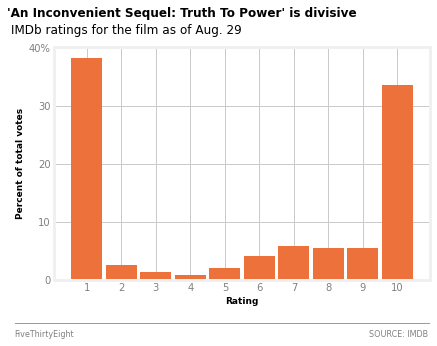

In [87]:
# generate graph

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

fig.patch.set(facecolor='white')

ax.bar(x=range(1,11), height=plot_data['percent'], width=.9, color='#ED713A')

ax.set(facecolor='white')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=12, fontweight='bold', x=.34, y=1.1) 

ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

ax.text(s='IMDb ratings for the film as of Aug. 29', y=42.5, x=-1.2, fontsize=12)

ax.tick_params(colors='grey')
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10)
ax.set_yticks(range(0,50,10))

ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=10)
ax.set_xticks(range(1,11))
plt.annotate('________________________________________________________________________________________________________', (0,0), (-40, -35), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
plt.annotate('FiveThirtyEight', (0,0), (-40, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
plt.annotate('SOURCE: IMDB', (0,0), (315, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
fig.show()

In [88]:
# replicate https://projects.fivethirtyeight.com/trump-approval-ratings/
!wget https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv

--2020-03-13 02:20:33--  https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv
Resolving projects.fivethirtyeight.com (projects.fivethirtyeight.com)... 151.101.2.109, 151.101.66.109, 151.101.130.109, ...
Connecting to projects.fivethirtyeight.com (projects.fivethirtyeight.com)|151.101.2.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2827723 (2.7M) [text/csv]
Saving to: ‘approval_polllist.csv.1’

approval_polllist.c 100%[===================>]   2.70M  15.4MB/s    in 0.2s    

2020-03-13 02:20:34 (15.4 MB/s) - ‘approval_polllist.csv.1’ saved [2827723/2827723]



In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

poll = pd.read_csv('approval_polllist.csv')
poll.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,3/12/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.696984,0.0,46.0,37.0,44.654727,38.343661,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,16:57:25 12 Mar 2020
1,Donald Trump,All polls,3/12/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.241682,0.0,45.0,45.0,45.688923,43.597452,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,16:57:25 12 Mar 2020
2,Donald Trump,All polls,3/12/2020,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.150785,0.0,42.1,45.2,42.849266,44.054346,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,16:57:25 12 Mar 2020
3,Donald Trump,All polls,3/12/2020,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.223234,0.0,45.0,46.0,45.688923,44.597452,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,16:57:25 12 Mar 2020
4,Donald Trump,All polls,3/12/2020,1/20/2017,1/25/2017,Quinnipiac University,B+,1190.0,rv,1.494494,0.0,36.0,44.0,37.558164,42.868848,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,16:57:25 12 Mar 2020


In [90]:
poll.tail()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
11268,Donald Trump,Voters,3/12/2020,3/8/2020,3/9/2020,HarrisX,C+,1001.0,rv,0.691603,0.601726,46.0,54.0,42.850555,52.689709,NaN,NaN,https://thehill.com/hilltv/what-americas-think...,64800,119940,3/11/2020,16:59:45 12 Mar 2020
11269,Donald Trump,Voters,3/12/2020,3/9/2020,3/10/2020,Ipsos,B-,961.0,rv,0.685071,0.641032,42.0,54.0,42.139169,52.114605,NaN,NaN,https://www.ipsos.com/en-us/news-polls/reuters...,64796,119932,3/11/2020,16:59:45 12 Mar 2020
11270,Donald Trump,Voters,3/12/2020,3/9/2020,3/11/2020,YouGov,B-,755.0,rv,0.165412,0.154514,44.0,54.0,43.118122,53.645400,NaN,NaN,https://docs.cdn.yougov.com/6skppne31l/tabs_Tr...,64797,119936,3/11/2020,16:59:45 12 Mar 2020
11271,Donald Trump,Voters,3/12/2020,3/9/2020,3/11/2020,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.490965,0.459777,48.0,50.0,43.501803,50.883978,NaN,T,http://www.rasmussenreports.com/public_content...,64809,119960,3/12/2020,16:59:45 12 Mar 2020
11272,Donald Trump,Voters,3/12/2020,3/10/2020,3/12/2020,YouGov,B-,738.0,rv,0.178130,0.178130,43.0,55.0,42.118122,54.645400,NaN,NaN,https://docs.cdn.yougov.com/hqg0thpf9l/tabs_Tr...,64813,119974,3/12/2020,16:59:45 12 Mar 2020


In [91]:
allpolls = poll[poll['subgroup'] == 'All polls']
cats = ['enddate','approve','disapprove']
final = allpolls[cats]
final

,enddate,approve,disapprove
0,1/22/2017,46.0,37.0
1,1/22/2017,45.0,45.0
2,1/24/2017,42.1,45.2
3,1/23/2017,45.0,46.0
4,1/25/2017,36.0,44.0
...,...,...,...
4662,3/10/2020,40.0,55.0
4663,3/11/2020,41.0,51.0
4664,3/11/2020,40.0,52.0
4665,3/12/2020,44.0,48.0


In [0]:
final['enddate'].col = pd.to_datetime(final['enddate'], infer_datetime_format = True)

In [0]:
final_app = final.groupby('enddate')['approve'].mean()

In [0]:
final_dis = final.groupby('enddate')['disapprove'].mean()

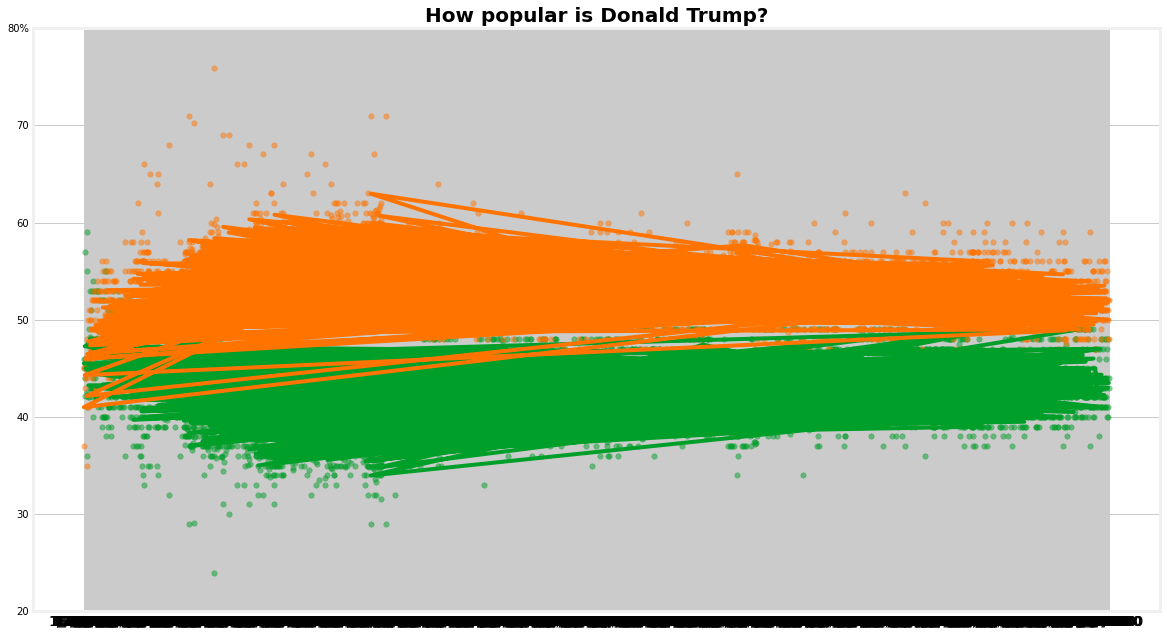

In [96]:
# generate graph (still working on date ticks)

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(18,10))
fig.patch.set(facecolor='white')
ax.scatter(final['enddate'], final['approve'], color='#009F29', s=30, alpha=.5)
ax.scatter(final['enddate'], final['disapprove'], color='#FF7400', s=30, alpha=.5)
ax.plot(final_app.index, final_app.values, color='#009F29')
ax.plot(final_dis.index, final_dis.values, color='#FF7400')

ax.set(facecolor='white')



ax.set_title("How popular is Donald Trump?", fontsize=20, fontweight='bold') 

#ax.xaxis.set_major_locator(plt.MaxNLocator(13))
#ax.set_xticks(range(1/3/2017,1/1/2020,10))
#ax.set_xticklabels(['Jan 23, 2017', 'April', 'July', 'Oct.'], fontsize=10)

ax.set_yticklabels(['20', '30', '40', '50', '60', '70', '80%'], fontsize=10)
ax.set_yticks(range(20,90,10))


plt.show()

 




NameError: ignored

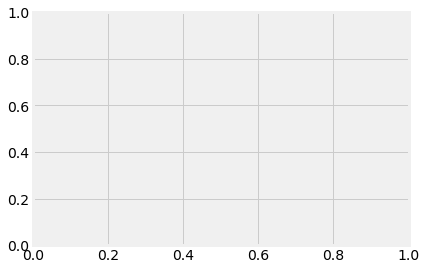

In [97]:
# generate graph

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')




fig, ax = plt.subplots()

fig.patch.set(facecolor='white')

ax.plot(x, )

ax.set(facecolor='white')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=12, fontweight='bold', x=.34, y=1.1) 

ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

ax.text(s='IMDb ratings for the film as of Aug. 29', y=42.5, x=-1.2, fontsize=12)

ax.tick_params(colors='grey')
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10)
ax.set_yticks(range(0,50,10))

ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=10)
ax.set_xticks(range(1,11))
plt.annotate('________________________________________________________________________________________________________', (0,0), (-40, -35), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
plt.annotate('FiveThirtyEight', (0,0), (-40, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
plt.annotate('SOURCE: IMDB', (0,0), (315, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
fig.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [61]:
import pandas as pd
import numpy as np
turkey = pd.read_csv('turkeytest')
turkey.head()

FileNotFoundError: ignored

In [62]:
!head turkeytest.csv

4337954960,Yes,Turkey,,Baked,,Bread-based,,None,,Yes,,Carrots,,,,,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,,,,Yams/sweet potato casserole,,,Apple,,,,,,,,,,,,,,,,,Cheesecake,Cookies,,Ice cream,,,,,Yes,Thanksgiving is local--it will take place in the town I live in,,12,Yes,No,No,No,,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
4337951949,Yes,Turkey,,Baked,,Bread-based,,Other (please specify),Homemade cranberry gelatin ring,Yes,,,,Corn,,,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Asian vinagrette salad,Apple,,,Chocolate,,,,,Pumpkin,,,Other (please specify),"Derby, Japanese fruit",,,,,Cheesecake,Cookies,,,,,Other (please specify),"Jelly roll, sweet cheeseball, chocolate dipped berries",Yes,Thanksgiving is out of town but not too far--it's a drive of a few hours or less,,19,No,No,Yes,No,,Rural,18 - 29,Female,"$50,000 to $74,999",East South Ce

In [0]:
import io
with io.open('thanksgiving-2015-poll-data.csv','r',encoding='utf8') as f:
    text = f.read()

In [37]:
text

'\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-5Bs4ERl99/u2AUfpOZF2F0cdfNby7+Vd9teUshXUBPo5CjwECR7IAEf+weI/eCk5tF7K1h3O8hd8k0+P/HePeg==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-e41b3811197df7fbb60147e939917617.css" />\n  <link crossorigin="anonymous" media="all" integrity="sha512-21eX2YaEYIYa91WFh0mXaxJ3wLQxy2ldlpRbyuCueK3MvqHGEzmXYPkMQ4

In [5]:
!apt-cache search libgeos

libgeos++-dev - Geometry engine for GIS - C++ development files
libgeos-3.6.2 - Geometry engine for Geographic Information Systems - C++ Library
libgeos-c1v5 - Geometry engine for Geographic Information Systems - C Library
libgeos-dev - Geometry engine for GIS - Development files
libgeos-doc - Documentation for the GEOS GIS geometry engine library
ruby-geos - GEOS bindings for Ruby


In [40]:
cat -n thanksgiving-2015-poll-data.csv | head -500

     1	
     2	
     3	
     4	
     5	
     6	
     7	<!DOCTYPE html>
     8	<html lang="en">
     9	  <head>
    10	    <meta charset="utf-8">
    11	  <link rel="dns-prefetch" href="https://github.githubassets.com">
    12	  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
    13	  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
    14	  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
    15	  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">
    16	  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
    17	  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">
    18	
    19	
    20	
    21	  <link crossorigin="anonymous" media="all" integrity="sha512-5Bs4ERl99/u2AUfpOZF2F0cdfNby7+Vd9teUshXUBPo5CjwECR7IAEf+weI/eCk5tF7K1h3O8hd8k0+P/HePeg==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-e41b3811197df7fbb60147e939917617.css

In [6]:
# install mpl_toolkits
!apt-get install libgeos-3.6.2
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Using cached https://files.pythonhosted.org/packages/77/15/d93f446d253d26b91553f86cf21049183e9b0f51f8c8e6cb2cff081bcc02/pyproj-2.5.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/27/16/3bf15aa864fb77845fab8007eda22c2bd67bd6c1fd13496df452c8c43621/pyshp-2.1.0.tar.gz
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756033 sha256=d12a3406c94b00f719d4f459c60f1b447

In [20]:
#download shape file
!wget https://github.com/matplotlib/basemap/raw/master/examples/st99_d00.shp

--2020-03-13 00:40:48--  https://github.com/matplotlib/basemap/raw/master/examples/st99_d00.shp
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/matplotlib/basemap/master/examples/st99_d00.shp [following]
--2020-03-13 00:40:48--  https://raw.githubusercontent.com/matplotlib/basemap/master/examples/st99_d00.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2300316 (2.2M) [application/octet-stream]
Saving to: ‘st99_d00.shp.1’

st99_d00.shp.1      100%[===================>]   2.19M  10.3MB/s    in 0.2s    

2020-03-13 00:40:48 (10.3 MB/s) - ‘st99_d00.shp.1’ saved [2300316/2300316]



In [21]:
!wget https://github.com/matplotlib/basemap/raw/master/examples/st99_d00.shx

--2020-03-13 00:40:52--  https://github.com/matplotlib/basemap/raw/master/examples/st99_d00.shx
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/matplotlib/basemap/master/examples/st99_d00.shx [following]
--2020-03-13 00:40:52--  https://raw.githubusercontent.com/matplotlib/basemap/master/examples/st99_d00.shx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2284 (2.2K) [application/octet-stream]
Saving to: ‘st99_d00.shx’

st99_d00.shx        100%[===================>]   2.23K  --.-KB/s    in 0s      

2020-03-13 00:40:52 (33.5 MB/s) - ‘st99_d00.shx’ saved [2284/2284]



In [22]:
!wget https://github.com/matplotlib/basemap/raw/master/examples/st99_d00.dbf

--2020-03-13 00:40:54--  https://github.com/matplotlib/basemap/raw/master/examples/st99_d00.dbf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/matplotlib/basemap/master/examples/st99_d00.dbf [following]
--2020-03-13 00:40:55--  https://raw.githubusercontent.com/matplotlib/basemap/master/examples/st99_d00.dbf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57411 (56K) [application/octet-stream]
Saving to: ‘st99_d00.dbf’

st99_d00.dbf        100%[===================>]  56.07K  --.-KB/s    in 0.03s   

2020-03-13 00:40:55 (2.17 MB/s) - ‘st99_d00.dbf’ saved [57411/57411]



### **from https://stackoverflow.com/questions/7586384/color-states-with-pythons-matplotlib-basemap ** 


In [59]:
# load test file
test = pd.read_csv('states.csv')
test.head()

,Alabama,MAC & CHEESE
0,Alaska,SALAD
1,Arizona,SALAD
2,Arksansas,GREEN BEANS / CASSEROLE
3,California,SALAD
4,Colorado,SALAD


In [0]:
tstate = test['Alabama']
tcolor = test['MAC & CHEESE']

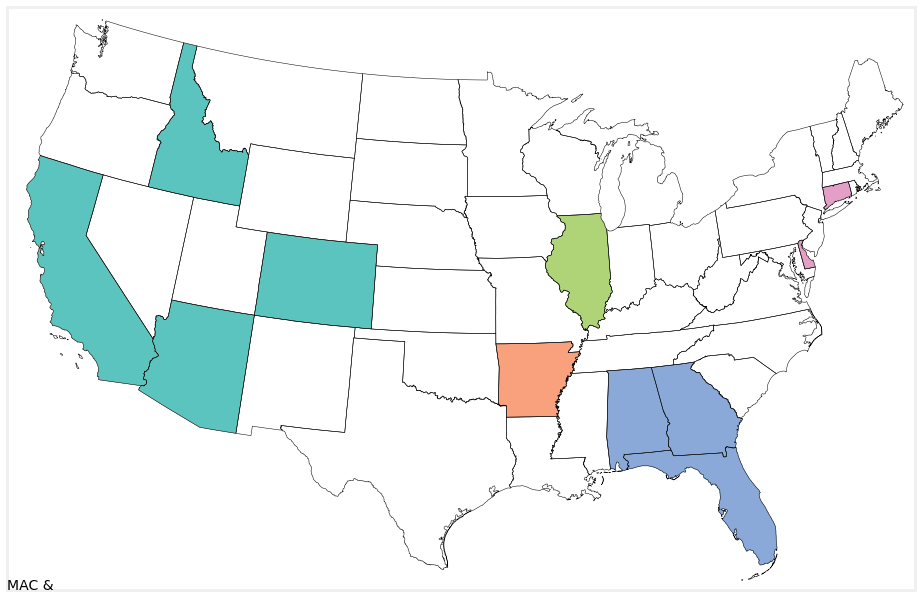

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(18,10))
fig.patch.set(facecolor='white')
ax.set(facecolor='white')

# create the map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

## load test file
#import = df.read_csv('states')

plt.text(10,16,'MAC &')

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon
seg = map.states[state_names.index('Alabama')]
poly = Polygon(seg, facecolor='#8AA9D8',edgecolor='#8EA9CE')
ax.add_patch(poly)

seg = map.states[state_names.index('Alaska')]
poly = Polygon(seg, facecolor='#5BC4BE',edgecolor='#ABAC9D')
ax.add_patch(poly)

seg = map.states[state_names.index('Arizona')]
poly = Polygon(seg, facecolor='#5BC4BE',edgecolor='#ABAC9D')
ax.add_patch(poly)

seg = map.states[state_names.index('Arkansas')]
poly = Polygon(seg, facecolor='#F8A17C',edgecolor='#BC9C8F')
ax.add_patch(poly)

seg = map.states[state_names.index('California')]
poly = Polygon(seg, facecolor='#5BC4BE',edgecolor='#ABAC9D')
ax.add_patch(poly)

seg = map.states[state_names.index('Colorado')]
poly = Polygon(seg, facecolor='#5BC4BE',edgecolor='#ABAC9D')
ax.add_patch(poly)

seg = map.states[state_names.index('Connecticut')]
poly = Polygon(seg, facecolor='#E39FC6',edgecolor='#CDA0BB')
ax.add_patch(poly)

seg = map.states[state_names.index('Delaware')]
poly = Polygon(seg, facecolor='#E39FC6',edgecolor='#CDA0BB')
ax.add_patch(poly)

seg = map.states[state_names.index('Florida')]
poly = Polygon(seg, facecolor='#8AA9D8',edgecolor='#8EA9CE')
ax.add_patch(poly)

seg = map.states[state_names.index('Georgia')]
poly = Polygon(seg, facecolor='#8AA9D8',edgecolor='#8EA9CE')
ax.add_patch(poly)

seg = map.states[state_names.index('Hawaii')]
poly = Polygon(seg, facecolor='#5BC4BE',edgecolor='#ABAC9D')
ax.add_patch(poly)

seg = map.states[state_names.index('Idaho')]
poly = Polygon(seg, facecolor='#5BC4BE',edgecolor='#ABAC9D')
ax.add_patch(poly)

seg = map.states[state_names.index('Illinois')]
poly = Polygon(seg, facecolor='#AED477',edgecolor='#99B0A7')
ax.add_patch(poly)






plt.show()